In [116]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [118]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')

In [120]:
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [122]:
df.isnull().sum().sum()

0

In [124]:
df.shape

(40034, 13)

In [126]:
df.dtypes

PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

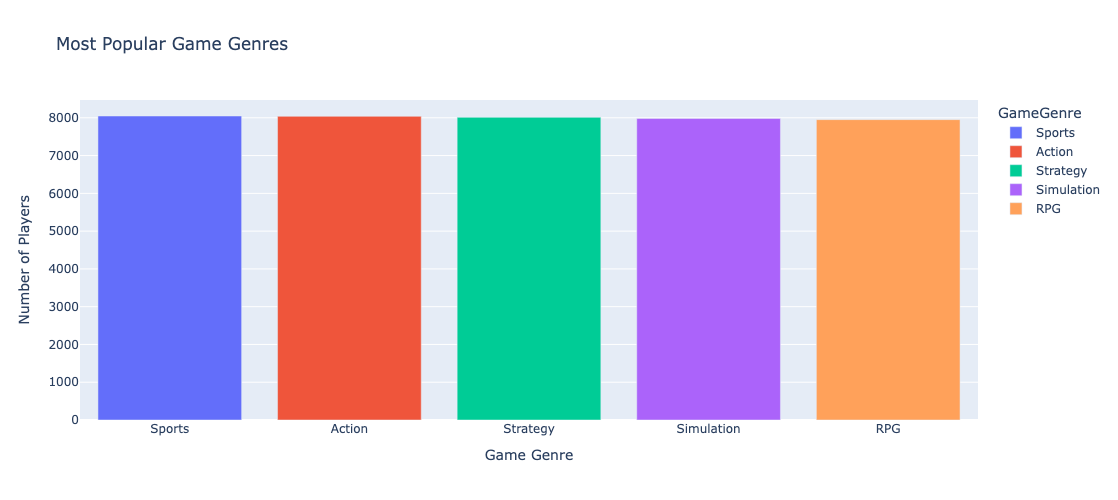

In [128]:
genre_counts = df['GameGenre'].value_counts().reset_index()
genre_counts.columns = ['GameGenre', 'Count']

fig1 = px.bar(genre_counts, 
            x='GameGenre', 
            y='Count',
            title='Most Popular Game Genres',
            color='GameGenre')

fig1.update_layout(
    xaxis_title='Game Genre',
    yaxis_title='Number of Players',
    width=900,
    height=500 
)

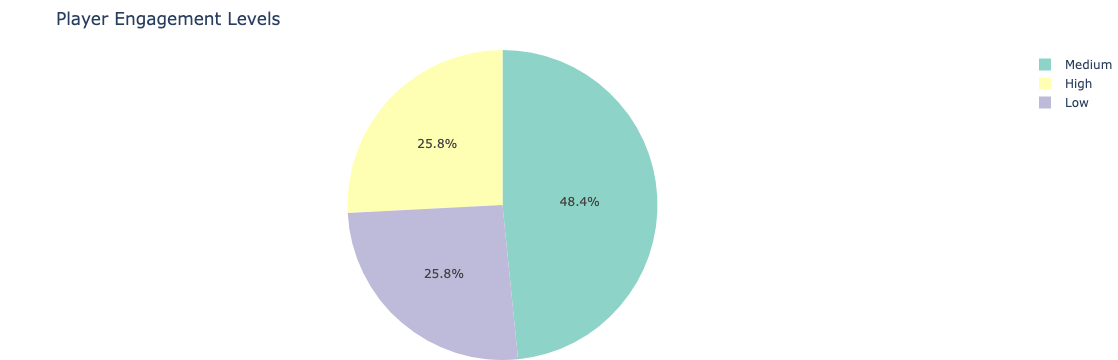

In [130]:
engagement_counts = df['EngagementLevel'].value_counts().reset_index()
engagement_counts.columns = ['EngagementLevel', 'Count']

fig2 = px.pie(engagement_counts, 
            values='Count', 
            names='EngagementLevel',
            title='Player Engagement Levels',
            color_discrete_sequence=px.colors.qualitative.Set3)

fig2.update_layout(margin=dict(t=50, b=0, l=0, r=0))

fig2.show()

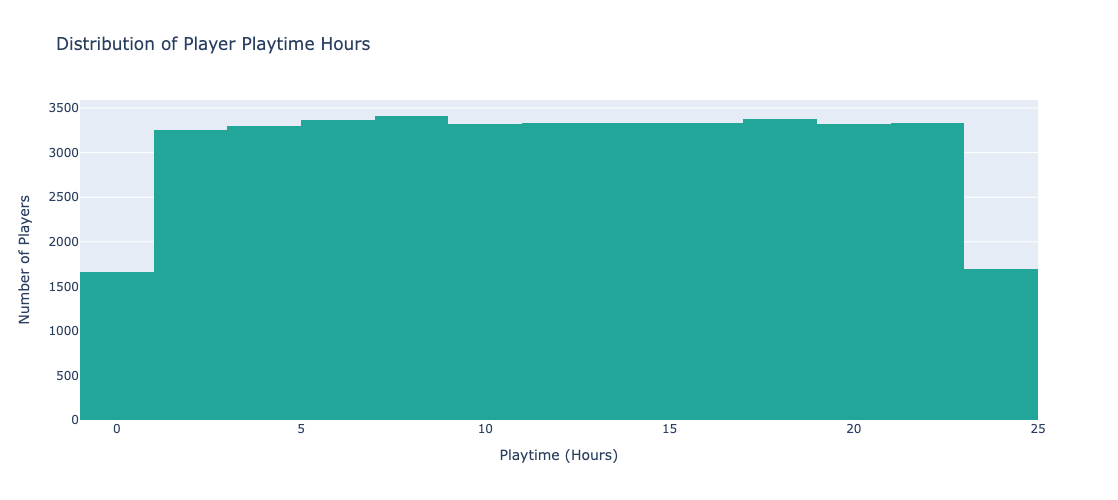

In [132]:
fig3 = px.histogram(df, 
                  x='PlayTimeHours',
                  title='Distribution of Player Playtime Hours',
                  nbins=20,
                  color_discrete_sequence=['#22A699'])

fig3.update_layout(
    xaxis_title='Playtime (Hours)',
    yaxis_title='Number of Players',
    width=900,
    height=500 
)

fig3.show()

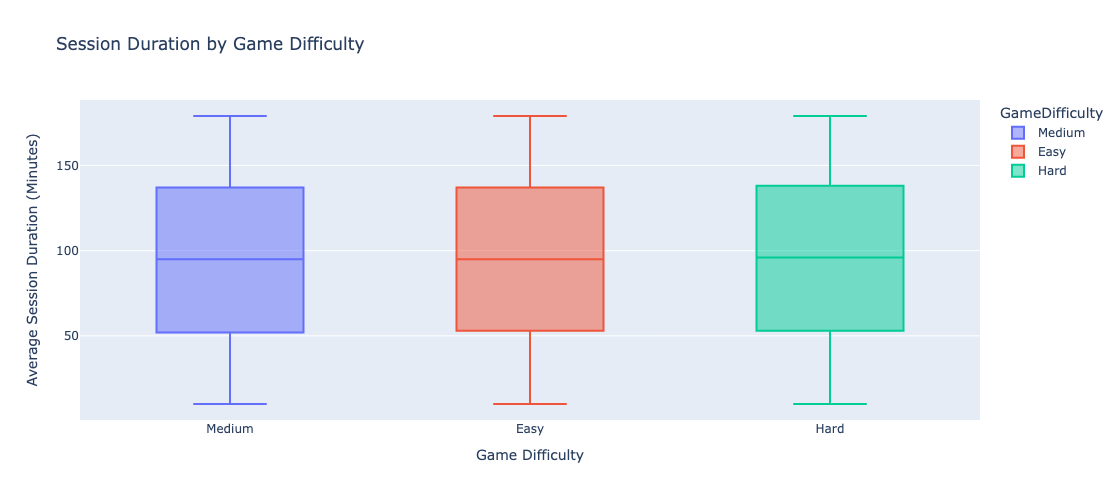

In [134]:
fig4 = px.box(df, 
             x='GameDifficulty', 
             y='AvgSessionDurationMinutes',
             title='Session Duration by Game Difficulty',
             color='GameDifficulty')

fig4.update_layout(
    xaxis_title='Game Difficulty',
    yaxis_title='Average Session Duration (Minutes)',
    width=900,
    height=500 
)

fig4.show()

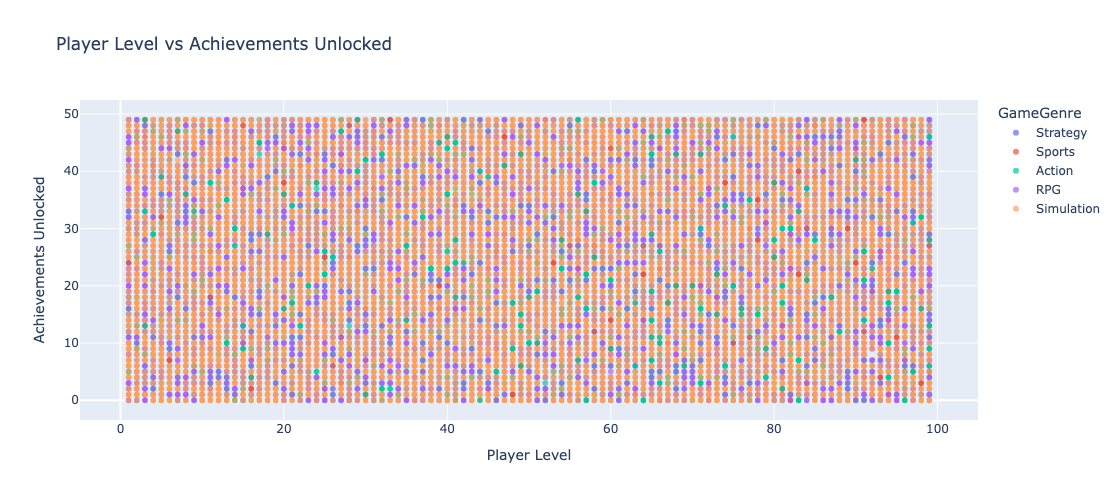

In [136]:
fig5 = px.scatter(df, 
                 x='PlayerLevel', 
                 y='AchievementsUnlocked',
                 title='Player Level vs Achievements Unlocked',
                 color='GameGenre',
                 opacity=0.7)

fig5.update_layout(
    xaxis_title='Player Level',
    yaxis_title='Achievements Unlocked',
    width=900,
    height=500 
)

fig5.show()

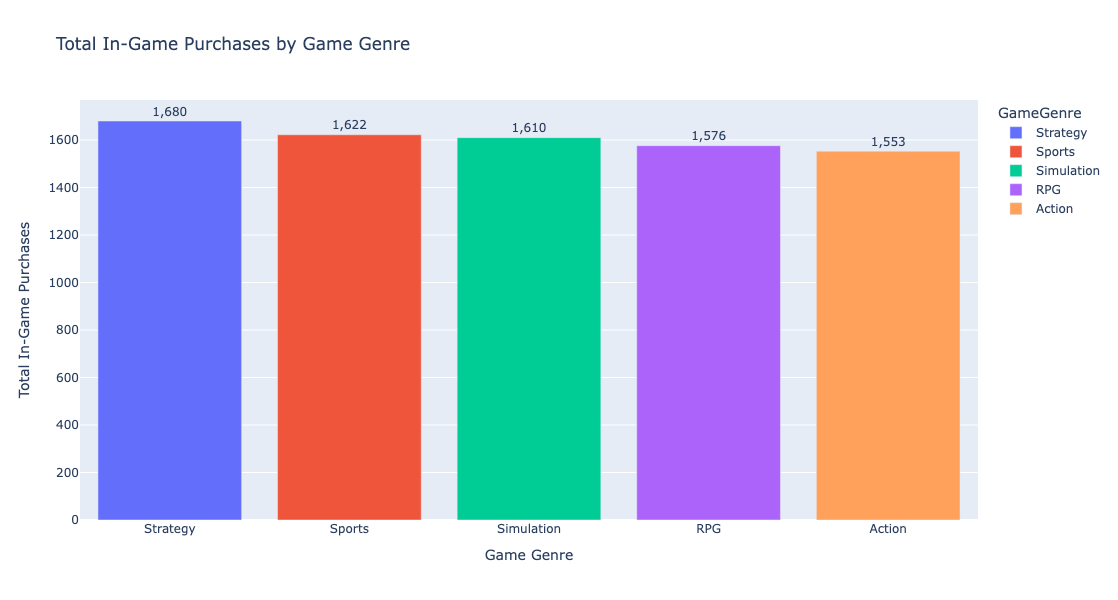

In [137]:
genre_purchases = df.groupby('GameGenre').sum()['InGamePurchases'].reset_index()

# Sort in descending order for better visualization
genre_purchases = genre_purchases.sort_values('InGamePurchases', ascending=False)

# Create the bar chart
fig = px.bar(genre_purchases, 
             x='GameGenre', 
             y='InGamePurchases',
             title='Total In-Game Purchases by Game Genre',
             color='GameGenre')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Game Genre',
    yaxis_title='Total In-Game Purchases',
    width=900,
    height=600,
    xaxis={'categoryorder':'total descending'}
)

# Add value labels on top of each bar
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')

# Show the visualization
fig.show()

In [140]:
# 1. Player Engagement Cluster
def classify_engagement(row):
    if row['PlayTimeHours'] < 2 and row['SessionsPerWeek'] < 3:
        return "Casual"
    elif row['PlayTimeHours'] < 5 and row['SessionsPerWeek'] < 6:
        return "Regular"
    else:
        return "Hardcore"

df['EngagementCluster'] = df.apply(classify_engagement, axis=1)

# 2. Spending Behavior
def classify_spending(row):
    if row['InGamePurchases'] == 0 and row['PlayerLevel'] < 10:
        return "Non-Spender"
    elif row['InGamePurchases'] == 1 and row['PlayerLevel'] < 30:
        return "Occasional-Spender"
    else:
        return "Heavy-Spender"

df['SpendingCategory'] = df.apply(classify_spending, axis=1)

# 3. Performance Category
def classify_performance(row):
    if row['PlayerLevel'] < 10 and row['AchievementsUnlocked'] < 5:
        return "Beginner"
    elif row['PlayerLevel'] < 30 and row['AchievementsUnlocked'] < 20:
        return "Intermediate"
    else:
        return "Pro"

df['PerformanceCategory'] = df.apply(classify_performance, axis=1)


In [142]:
df_numeric = df.copy()
categorical_columns = ['Gender', 'GameDifficulty', 'EngagementLevel', 'GameGenre', 'Location', 'PerformanceCategory', 'SpendingCategory', 'EngagementCluster']
df_numeric = pd.get_dummies(df_numeric, columns=categorical_columns, drop_first=False)
df_label = df.copy()

In [144]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    df_label[f'{column}_Encoded'] = le.fit_transform(df_label[column])
    # Store mapping for reference
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Encoding for {column}: {mapping}")


Encoding for Gender: {'Female': 0, 'Male': 1}
Encoding for GameDifficulty: {'Easy': 0, 'Hard': 1, 'Medium': 2}
Encoding for EngagementLevel: {'High': 0, 'Low': 1, 'Medium': 2}
Encoding for GameGenre: {'Action': 0, 'RPG': 1, 'Simulation': 2, 'Sports': 3, 'Strategy': 4}
Encoding for Location: {'Asia': 0, 'Europe': 1, 'Other': 2, 'USA': 3}
Encoding for PerformanceCategory: {'Beginner': 0, 'Intermediate': 1, 'Pro': 2}
Encoding for SpendingCategory: {'Heavy-Spender': 0, 'Non-Spender': 1, 'Occasional-Spender': 2}
Encoding for EngagementCluster: {'Casual': 0, 'Hardcore': 1, 'Regular': 2}


In [146]:
print("\nOne-hot encoded DataFrame (first 5 columns only):")
print(df_numeric.iloc[:5, :5])

print("\nLabel encoded DataFrame:")
print(df_label.iloc[:5, -5:]) 


One-hot encoded DataFrame (first 5 columns only):
   PlayerID  Age  PlayTimeHours  InGamePurchases  SessionsPerWeek
0      9000   43      16.271119                0                6
1      9001   29       5.525961                0                5
2      9002   22       8.223755                0               16
3      9003   35       5.265351                1                9
4      9004   33      15.531945                0                2

Label encoded DataFrame:
   GameGenre_Encoded  Location_Encoded  PerformanceCategory_Encoded  \
0                  4                 2                            2   
1                  4                 3                            1   
2                  3                 3                            2   
3                  0                 3                            2   
4                  0                 1                            2   

   SpendingCategory_Encoded  EngagementCluster_Encoded  
0                         0                

In [148]:
numeric_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'] + \
               [col for col in df_label.columns if col.endswith('_Encoded')]

corr_matrix = df_label[numeric_cols].corr()


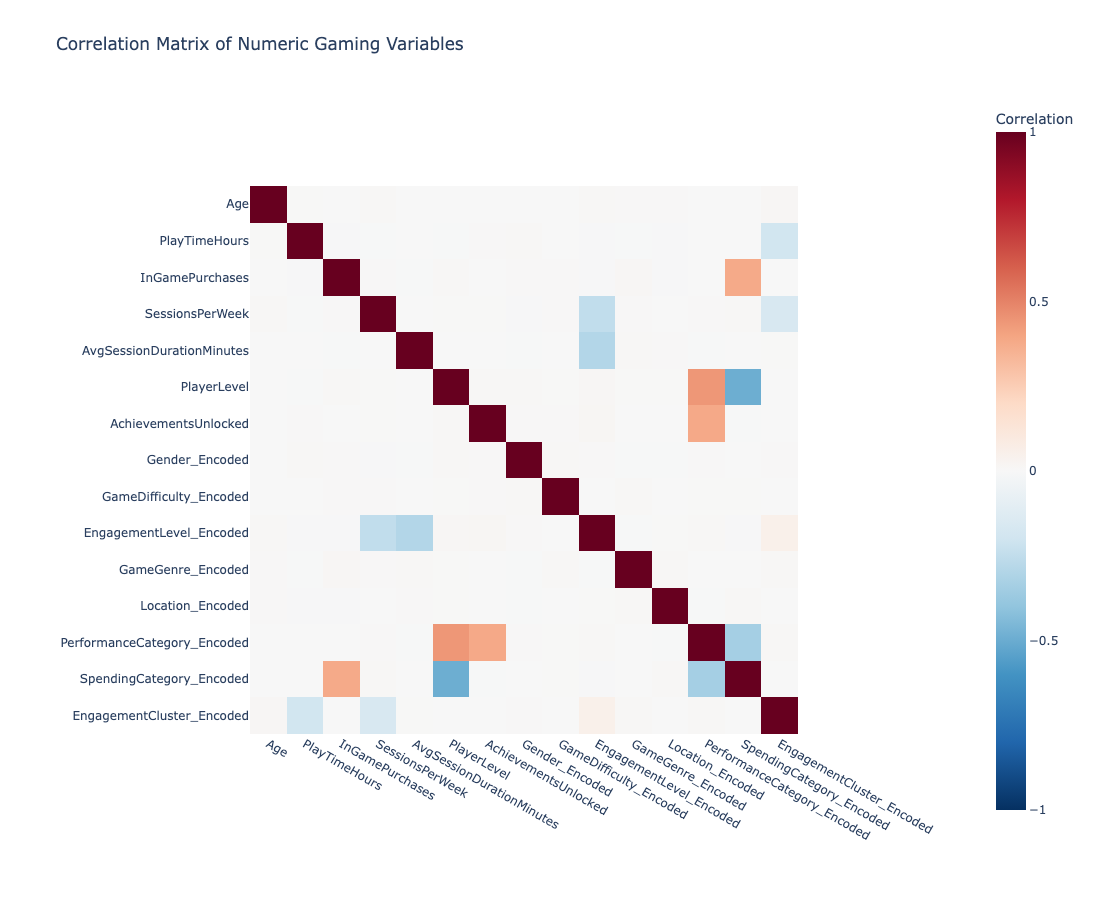

In [150]:
fig = px.imshow(corr_matrix,
                labels=dict(color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                title="Correlation Matrix of Numeric Gaming Variables",
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1)

fig.update_layout(width=900, height=900)
fig.show()

## Checking the suitability of this dataset for multilabel classification by checking:
1. **Target Variables:** The dataset has two categorical targets that could be predicted:
    - GameGenre (e.g., Action, Sports, Strategy) – Multiclass
    - EngagementLevel (High, Medium, Low) – Multiclass
2. **Independence of Targets:** If GameGenre and EngagementLevel are strongly correlated, a single-task classification (one predicting the other) may be better. GameGenre and EngagementLevel have no strong correlation, as engagement levels are fairly balanced across all game genres.
3. **Class Distribution Check (Required):** GameGenre is evenly distributed, with all five genres (Sports, Action, Strategy, Simulation, RPG) having ~20% share. EngagementLevel is slightly imbalanced, with:
    - Medium (48.4%) being the most common.
    - High (25.8%) and Low (25.8%) equally represented.
4. **Feature-Target Relationship:** Features like PlayTimeHours, PlayerLevel, AchievementsUnlocked likely influence EngagementLevel.
Features like Location, Age, Gender may influence GameGenre.

In [27]:
# Class distribution bar plots 
game_genre_counts = df["GameGenre"].value_counts().reset_index()
game_genre_counts.columns = ["GameGenre", "Count"]

engagement_counts = df["EngagementLevel"].value_counts().reset_index()
engagement_counts.columns = ["EngagementLevel", "Count"]

fig1 = px.bar(game_genre_counts, 
              x="GameGenre", y="Count", 
              title="GameGenre Distribution",
              text_auto=True)
fig1.show()

fig2 = px.bar(engagement_counts, 
              x="EngagementLevel", y="Count", 
              title="EngagementLevel Distribution",
              text_auto=True)
fig2.show()

In [29]:
# Correlation heatmap
cross_tab = pd.crosstab(df["GameGenre"], df["EngagementLevel"], normalize="index")

fig3 = go.Figure(data=go.Heatmap(
    z=cross_tab.values,
    x=cross_tab.columns,
    y=cross_tab.index,
    colorscale="Blues",
    texttemplate="%{z:.2f}"
))

fig3.update_layout(
    title="Game Genre vs. Engagement Level Correlation",
    xaxis_title="Engagement Level",
    yaxis_title="Game Genre"
)

fig3.show()

Lower chi2 value and higer p-value suggests that the two variables are independent of each other. So in conclusion,
**Multilabel classification is suitable**. We can build a model to predict both GameGenre (multiclass) and EngagementLevel (multiclass) simultaneously.

In [33]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(cross_tab)
print(chi2, p)

0.0010788543400796213 0.9999999999999964


## Preprocessing the dataset
1. Data Cleaning:
    - Handle missing values - No misisng values
    - Drop irrelevant columns - PlayerID
2. Encoding Categorical Features:
    - Convert categorical columns (Gender, Location, GameDifficulty) into numerical form using one-hot encoding.
    - Convert target variables (GameGenre, EngagementLevel) into one-hot encoded labels for multilabel classification.
3. Feature Scaling:
    - Normalize numerical columns (PlayTimeHours, SessionsPerWeek, AvgSessionDurationMinutes, etc.) using MinMaxScaler.

In [37]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [42]:
df.isnull().sum().sum()

0

In [48]:
df_clean = df.drop(columns=["PlayerID"])

In [50]:
categorical_features = ["Gender", "Location", "GameDifficulty"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_features = pd.DataFrame(encoder.fit_transform(df_clean[categorical_features]))

# Rename columns properly after encoding
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# Reset index to merge properly
encoded_features.reset_index(drop=True, inplace=True)
df_clean.reset_index(drop=True, inplace=True)


In [52]:
# Convert target variables to one-hot encoding (Multilabel Setup)
target_encoder = OneHotEncoder(sparse_output=False)
encoded_targets = pd.DataFrame(target_encoder.fit_transform(df[["GameGenre", "EngagementLevel"]]))

# Rename target columns
encoded_targets.columns = target_encoder.get_feature_names_out(["GameGenre", "EngagementLevel"])
encoded_targets.reset_index(drop=True, inplace=True)

# Drop original categorical columns
df_clean = df_clean.drop(columns=categorical_features + ["GameGenre", "EngagementLevel"])


In [54]:
encoded_features.sample(n=2)

Gender_Female  Gender_Male  Location_Asia  Location_Europe  \
38506            0.0          1.0            1.0              0.0   
13700            1.0          0.0            0.0              0.0   

       Location_Other  Location_USA  GameDifficulty_Easy  GameDifficulty_Hard  \
38506             0.0           0.0                  1.0                  0.0   
13700             0.0           1.0                  1.0                  0.0   

       GameDifficulty_Medium  
38506                    0.0  
13700                    0.0

In [56]:
encoded_targets.sample(n=2)

GameGenre_Action  GameGenre_RPG  GameGenre_Simulation  \
11468               1.0            0.0                   0.0   
17175               0.0            0.0                   0.0   

       GameGenre_Sports  GameGenre_Strategy  EngagementLevel_High  \
11468               0.0                 0.0                   0.0   
17175               0.0                 1.0                   1.0   

       EngagementLevel_Low  EngagementLevel_Medium  
11468                  0.0                     1.0  
17175                  0.0                     0.0

In [58]:
df_clean.sample(n=2)

Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
28646   20       4.389597                0                6   
32495   48       3.483045                0               12   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  
28646                         92           50                     5  
32495                         71           18                    31

In [60]:
# Scale numerical features
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [62]:
final_df = pd.concat([scaled_features, encoded_features, encoded_targets], axis=1)
final_df.sample(3)

Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
25627  0.058824       0.649883              1.0         0.105263   
471    0.176471       0.799069              0.0         0.842105   
38764  0.588235       0.657756              1.0         0.578947   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
25627                   0.331361     0.653061              0.306122   
471                     0.479290     0.193878              0.632653   
38764                   0.609467     0.959184              0.408163   

       Gender_Female  Gender_Male  Location_Asia  ...  GameDifficulty_Hard  \
25627            1.0          0.0            0.0  ...                  0.0   
471              0.0          1.0            0.0  ...                  0.0   
38764            1.0          0.0            0.0  ...                  0.0   

       GameDifficulty_Medium  GameGenre_Action  GameGenre_RPG  \
25627                    0.0               0.0            0.0   
471                      1.0               0.0            0.0   
38764                    1.0               0.0            0.0   

       GameGenre_Simulation  GameGenre_Sports  GameGenre_Strategy  \
25627                   1.0               0.0                 0.0   
471                     1.0               0.0                 0.0   
38764                   1.0               0.0                 0.0   

       EngagementLevel_High  EngagementLevel_Low  EngagementLevel_Medium  
25627                   0.0                  1.0                     0.0  
471                     1.0                  0.0                     0.0  
38764                   0.0                  0.0                     1.0  

[3 rows x 24 columns]

In [64]:
final_df.to_csv('final_df.csv')

## Feature Importance

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and targets (y)
X = final_df.iloc[:, :-8]  # All columns except the last 8 (target labels)
y = final_df.iloc[:, -8:]  # Last 8 columns are the one-hot encoded target labels

# Train a Random Forest model for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importances = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print("Top Features:")
print(importance_df.head(10))

Top Features:
                      Feature  Importance
3             SessionsPerWeek    0.237813
4   AvgSessionDurationMinutes    0.215263
1               PlayTimeHours    0.114588
5                 PlayerLevel    0.106207
6        AchievementsUnlocked    0.099253
0                         Age    0.095567
2             InGamePurchases    0.015554
12               Location_USA    0.015135
10            Location_Europe    0.014596
13        GameDifficulty_Easy    0.013987


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# DataLoader setup
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Neural Network Model
class MultiLabelNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Sigmoid for multilabel classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Model Initialization
input_dim = X.shape[1]
output_dim = y.shape[1]
model = MultiLabelNN(input_dim, output_dim)

# Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy for multilabel classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 486.3832
Epoch 2/10, Loss: 428.7529
Epoch 3/10, Loss: 412.8967
Epoch 4/10, Loss: 407.1223
Epoch 5/10, Loss: 404.5862
Epoch 6/10, Loss: 402.9465
Epoch 7/10, Loss: 401.5587
Epoch 8/10, Loss: 400.5709
Epoch 9/10, Loss: 399.3972
Epoch 10/10, Loss: 398.2292


In [69]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Function to evaluate the model on the test set
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():  # Disable gradient computation during inference
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)
            all_preds.append(preds)
            all_labels.append(labels)
    
    # Convert lists of tensors to numpy arrays
    all_preds = torch.cat(all_preds).cpu().numpy()
    all_labels = torch.cat(all_labels).cpu().numpy()
    
    # Calculate accuracy, precision, recall, and F1 score for each label
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
# Evaluate the model on the test set
evaluate_model(model, test_loader)


Accuracy: 0.0000
Precision: 0.3438
Recall: 0.3339
F1 Score: 0.3386


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [73]:

from torch.utils.data import Dataset, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

In [74]:
# Model Definition
class MultiLabelClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.3):
        super(MultiLabelClassifier, self).__init__()
        
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.bn2 = nn.BatchNorm1d(hidden_dim // 2)
        self.layer3 = nn.Linear(hidden_dim // 2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer3(x)
        x = self.sigmoid(x)
        
        return x

In [75]:
# Training and Evaluation
def train_and_evaluate(train_dataset, test_dataset, input_dim, output_dim, 
                       hidden_dim=128, lr=0.001, batch_size=64, epochs=10):
    """Train and evaluate the model"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Create model
    model = MultiLabelClassifier(input_dim, hidden_dim, output_dim).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Training loop
    history = {'train_loss': [], 'val_loss': []}
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
        
        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                running_val_loss += loss.item() * inputs.size(0)
        
        val_loss = running_val_loss / len(test_loader.dataset)
        history['val_loss'].append(val_loss)
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    # Evaluation
    model.eval()
    all_outputs = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            all_outputs.append(outputs.cpu())
            all_targets.append(targets)
    
    # Convert to numpy for metric calculation
    all_outputs = torch.cat(all_outputs, dim=0).numpy()
    all_targets = torch.cat(all_targets, dim=0).numpy()
    
    # Convert to binary predictions using threshold
    y_pred = (all_outputs > 0.5).astype(int)
    
    # Calculate overall metrics
    accuracy = accuracy_score(all_targets.flatten(), y_pred.flatten())
    f1_macro = f1_score(all_targets, y_pred, average='macro')
    f1_weighted = f1_score(all_targets, y_pred, average='weighted')
    
    print("\nModel Evaluation:")
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Overall F1 (Macro): {f1_macro:.4f}")
    print(f"Overall F1 (Weighted): {f1_weighted:.4f}")
    
    return model, history, y_pred, all_targets

In [76]:
# Hyperparameter Tuning
def basic_hyperparameter_tuning(train_dataset, test_dataset, input_dim, output_dim):
    """Simple grid search for hyperparameter tuning"""
    learning_rates = [0.01, 0.001, 0.0001]
    hidden_dims = [64, 128, 256]
    batch_sizes = [32, 64, 128]
    
    best_f1 = 0
    best_params = {}
    
    for lr in learning_rates:
        for hidden_dim in hidden_dims:
            for batch_size in batch_sizes:
                print(f"\nTrying: lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}")
                
                try:
                    _, _, y_pred, y_true = train_and_evaluate(
                        train_dataset, test_dataset, 
                        input_dim, output_dim,
                        hidden_dim=hidden_dim, 
                        lr=lr, 
                        batch_size=batch_size,
                        epochs=3  # Fewer epochs for tuning
                    )
                    
                    f1 = f1_score(y_true, y_pred, average='weighted')
                    
                    if f1 > best_f1:
                        best_f1 = f1
                        best_params = {
                            'learning_rate': lr,
                            'hidden_dim': hidden_dim,
                            'batch_size': batch_size
                        }
                        
                except Exception as e:
                    print(f"Error with these parameters: {e}")
    
    print(f"\nBest parameters: {best_params}")
    print(f"Best F1 score: {best_f1:.4f}")
    
    return best_params



In [77]:
# Visualizations
def plot_training_history(history):
    """Plot training and validation loss"""
    plt.figure(figsize=(10, 6))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_confusion_matrices(y_true, y_pred, target_names):
    """Plot confusion matrices for each class"""
    n_classes = len(target_names)
    fig, axes = plt.subplots(1, n_classes, figsize=(20, 4))
    
    if n_classes == 1:
        axes = [axes]
    
    for i, (ax, class_name) in enumerate(zip(axes, target_names)):
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        
        # Display the matrix
        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(class_name)
        
        # Add labels and values
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['Pred 0', 'Pred 1'])
        ax.set_yticklabels(['True 0', 'True 1'])
        
        # Add text annotations
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()


In [78]:
# Define target columns
genre_columns = ['GameGenre_Action', 'GameGenre_RPG', 'GameGenre_Simulation', 'GameGenre_Sports', 'GameGenre_Strategy']
engagement_columns = ['EngagementLevel_High', 'EngagementLevel_Low', 'EngagementLevel_Medium']
target_columns = genre_columns + engagement_columns

X = final_df.drop(target_columns, axis=1)
y = final_df[target_columns]



=== Training Basic Model ===
Using device: cpu
Epoch 1/10, Train Loss: 0.4827, Val Loss: 0.4261
Epoch 2/10, Train Loss: 0.4387, Val Loss: 0.4166
Epoch 3/10, Train Loss: 0.4308, Val Loss: 0.4120
Epoch 4/10, Train Loss: 0.4259, Val Loss: 0.4093
Epoch 5/10, Train Loss: 0.4240, Val Loss: 0.4063
Epoch 6/10, Train Loss: 0.4213, Val Loss: 0.4053
Epoch 7/10, Train Loss: 0.4209, Val Loss: 0.4043
Epoch 8/10, Train Loss: 0.4210, Val Loss: 0.4062
Epoch 9/10, Train Loss: 0.4195, Val Loss: 0.4039
Epoch 10/10, Train Loss: 0.4186, Val Loss: 0.4027

Model Evaluation:
Overall Accuracy: 0.8506
Overall F1 (Macro): 0.3360
Overall F1 (Weighted): 0.4506


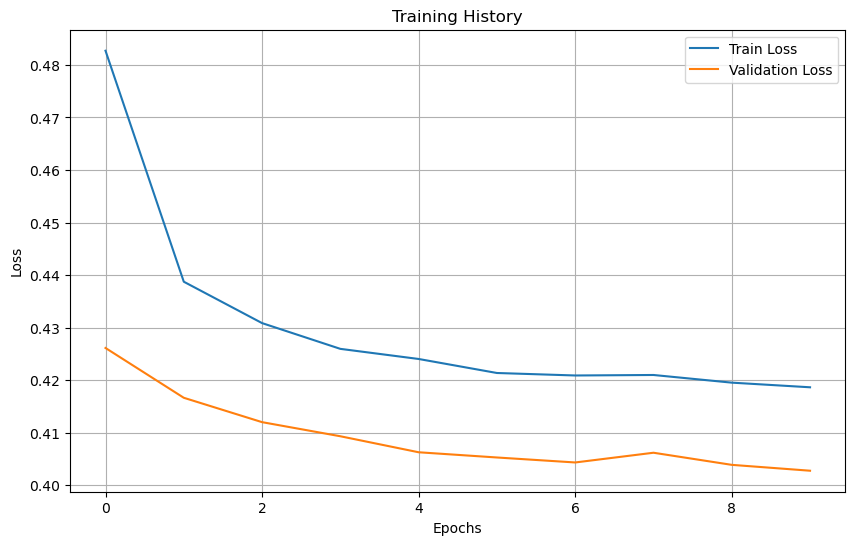

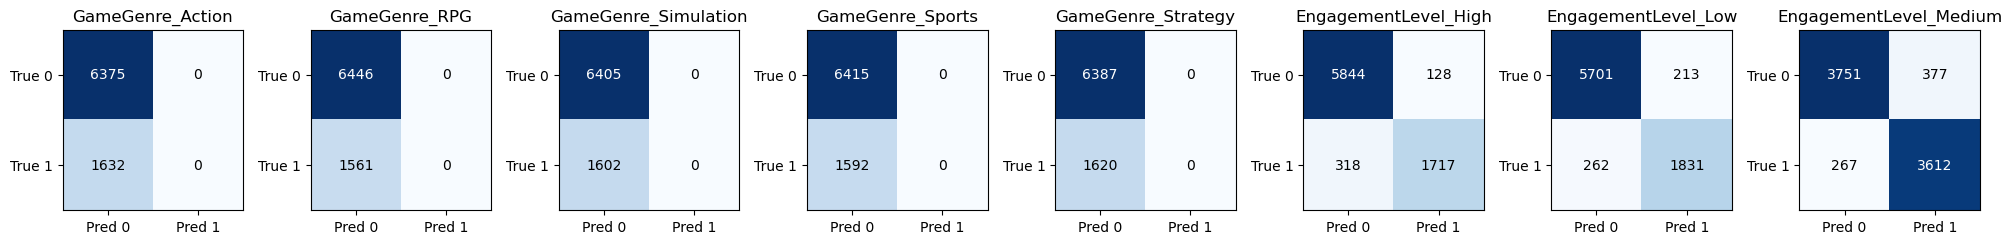


=== Hyperparameter Tuning ===

Trying: lr=0.01, hidden_dim=64, batch_size=32
Using device: cpu
Epoch 1/3, Train Loss: 0.4526, Val Loss: 0.4181
Epoch 2/3, Train Loss: 0.4380, Val Loss: 0.4105
Epoch 3/3, Train Loss: 0.4351, Val Loss: 0.4084

Model Evaluation:
Overall Accuracy: 0.8486
Overall F1 (Macro): 0.3332
Overall F1 (Weighted): 0.4467

Trying: lr=0.01, hidden_dim=64, batch_size=64
Using device: cpu
Epoch 1/3, Train Loss: 0.4518, Val Loss: 0.4136
Epoch 2/3, Train Loss: 0.4278, Val Loss: 0.4091
Epoch 3/3, Train Loss: 0.4249, Val Loss: 0.4075

Model Evaluation:
Overall Accuracy: 0.8465
Overall F1 (Macro): 0.3306
Overall F1 (Weighted): 0.4425

Trying: lr=0.01, hidden_dim=64, batch_size=128
Using device: cpu
Epoch 1/3, Train Loss: 0.4523, Val Loss: 0.4108
Epoch 2/3, Train Loss: 0.4230, Val Loss: 0.4080
Epoch 3/3, Train Loss: 0.4187, Val Loss: 0.4043

Model Evaluation:
Overall Accuracy: 0.8484
Overall F1 (Macro): 0.3330
Overall F1 (Weighted): 0.4464

Trying: lr=0.01, hidden_dim=128, batc

In [79]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values)

# Create tensor datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

input_dim = X_train.shape[1]
output_dim = len(target_columns)

print("\n=== Training Basic Model ===")
model, history, y_pred, y_true = train_and_evaluate(
    train_dataset, test_dataset, 
    input_dim, output_dim,
    epochs=10
)

plot_training_history(history)

plot_confusion_matrices(y_true, y_pred, target_columns)

# Run hyperparameter tuning
print("\n=== Hyperparameter Tuning ===")
best_params = basic_hyperparameter_tuning(train_dataset, test_dataset, input_dim, output_dim)

# Train final model with best parameters (if tuning was done)
# If you ran hyperparameter tuning, use best parameters here
final_model, final_history, final_preds, final_targets = train_and_evaluate(
     train_dataset, test_dataset,
     input_dim, output_dim,
     hidden_dim=best_params['hidden_dim'],
     lr=best_params['learning_rate'],
     batch_size=best_params['batch_size'],
     epochs=15
 )



## Feature Engineering 

In [102]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')

In [104]:
# 1. Player Engagement Cluster
def classify_engagement(row):
    if row['PlayTimeHours'] < 2 and row['SessionsPerWeek'] < 3:
        return "Casual"
    elif row['PlayTimeHours'] < 5 and row['SessionsPerWeek'] < 6:
        return "Regular"
    else:
        return "Hardcore"

df['EngagementCluster'] = df.apply(classify_engagement, axis=1)

# 2. Spending Behavior
def classify_spending(row):
    if row['InGamePurchases'] == 0 and row['PlayerLevel'] < 10:
        return "Non-Spender"
    elif row['InGamePurchases'] == 1 and row['PlayerLevel'] < 30:
        return "Occasional-Spender"
    else:
        return "Heavy-Spender"

df['SpendingCategory'] = df.apply(classify_spending, axis=1)

# 3. Performance Category
def classify_performance(row):
    if row['PlayerLevel'] < 10 and row['AchievementsUnlocked'] < 5:
        return "Beginner"
    elif row['PlayerLevel'] < 30 and row['AchievementsUnlocked'] < 20:
        return "Intermediate"
    else:
        return "Pro"

df['PerformanceCategory'] = df.apply(classify_performance, axis=1)


In [108]:
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel', 'EngagementCluster', 'SpendingCategory',
       'PerformanceCategory'],
      dtype='object')

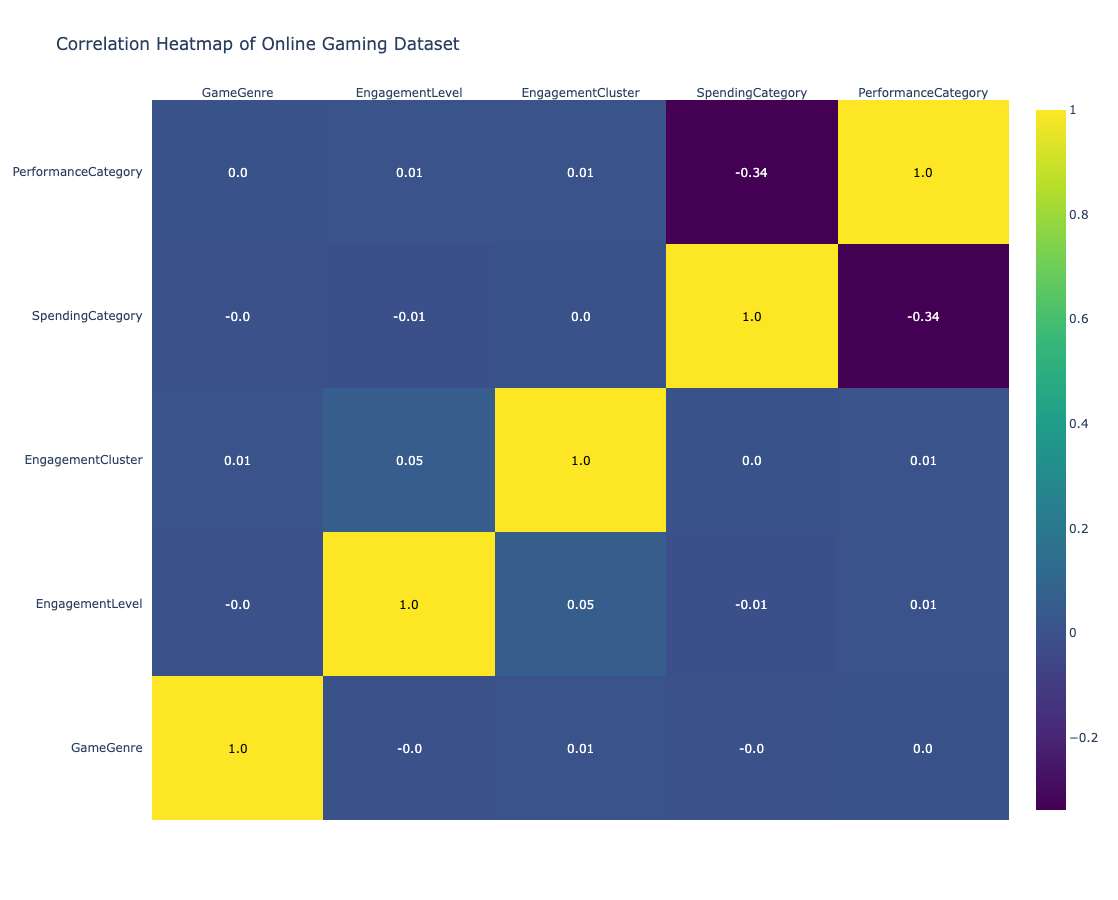

In [114]:
label_encoders = {}
categorical_cols = ["GameGenre", "EngagementLevel", "EngagementCluster", "SpendingCategory", "PerformanceCategory"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders in case we need inverse transformation

# Compute correlation matrix
corr_matrix = df.loc[:,categorical_cols].corr()

# Create interactive heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale="Viridis",
    annotation_text=np.round(corr_matrix.values, 2),
    showscale=True,
)

# Display heatmap
fig.update_layout(title="Correlation Heatmap of Online Gaming Dataset", autosize=False, width=900, height=900)
fig.show()